# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
# Add your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.__version__

'0.23.0'

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Write your code here
colors_df = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip')
inventories_df = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip')
inventory_part_df = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip')
inventory_sets_df = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip')
part_categories_df = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip')
parts_df = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip')
sets_df = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip')
themes_df = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
# Write your code here
sets_df.head(50)
print (np.mean(sets_df.num_parts))

162.26240041120533


In [6]:
np.unique(sets_df.year)

array(['-1962', '-1966', '-1969', '-1971', '-1973', '-1975', '-1977',
       '-1979', '-1980', '-1981', '-1982', '-1983', '-1984', '-1985',
       '-1986', '-1987', '-1988', '-1989', '-1991', '-1992', '-1993',
       '-1994', '-1995', '-1996', '-1997', '-19977', '-1998', '-1999',
       '-19999', '-2000', '-20000', '-2001', '-20011', '-2002', '-20022',
       '-2003', '-20033', '-2004', '-20044', '-2005', '-2006', '-20066',
       '-2007', '-20077', '-2008', '-2009', '-20099', '-2010', '-20100',
       '-2011', '-20111', '-2012', '-20122', '-2013', '-20133', '-2014',
       '-20144', '-2015', '-20155', '-2016', '-20166', '-2017', '1950',
       '1953', '1954', '1955', '19555', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '19622', '1963', '1964', '1965', '1966',
       '19666', '1967', '1968', '1969', '19699', '1971', '1972', '19722',
       '1973', '1974', '1975', '1976', '1977', '19777', '1978', '19788',
       '1979', '19799', '19800', '1981', '19811', '1982', '1982

Some of the consistencies are as you can see in the sets years, the negative sign, repeating the last digit twice and putting values representing ranges of years instead of a specific year. To resolve these inconsistencies, we either corrected them (negative sign and repeated last digit) or filtered them (70s and 80s)

In [7]:
#rectify the format of date and remove the typo error possibly due to pressing the last keyword twice
def clean_year(item):
    if 's' in (item) :
        return '@'
    if len(item) > 4:
        return item[:4]
    else :
        return item

In [8]:
# check null values
sets_df['year'].isnull().values.any()

False

In [9]:
sets_df['year'] = sets_df['year'].str.replace('-','')    #remove negative sign
sets_df['year'] = sets_df['year'].apply(clean_year)    
sets_df = sets_df[sets_df.year!='@']
print('Time range of sets : {} - {} '.format(sets_df['year'].min(),sets_df['year'].max()))

Time range of sets : 1950 - 2017 


In [10]:
print('There are only '+str(len(sets_df[sets_df['year']=='1980']))+' sets dating to 1980')

There are only 3 sets dating to 1980


In [11]:
sets_df[sets_df['year']=='1981']

,id,name,year,theme_id,num_parts
336,1060-1,Road Plates and Signs,1981,533,30
355,1064-1,Dacta Buildings,1981,533,0
506,1-11,Basic Souvenir Box,1981,469,36
535,1131-1,Tires (42 mm) and Hubs,1981,453,4
537,1132-1,Hinges,1981,443,8
538,1133-1,Brick Hinges,1981,443,8
539,1134-1,Battery Wagon,1981,456,2
540,1135-1,"Battery Cable Kit: 12 Connectors, 3m Cable",1981,443,13
541,1135-2,"Battery Cable Kit: 16 Connectors, 3m Cable",1981,443,17
542,1135-3,"Battery Cable Kit: 20 Connectors, 3m Cable",1981,443,21


In [12]:
inventory_part_df.isnull().values.any()

False

In [13]:
inventory_part_df.groupby('quantity').size()

quantity
-inf            161796
 1.000000       239479
 3.000000        31219
 4.000000        62072
 5.000000        11448
 6.000000        20144
 7.000000         5204
 8.000000        13723
 9.000000         3216
 10.000000        5943
 11.000000        1957
 12.000000        4810
 13.000000        1292
 14.000000        2395
 15.000000         980
 16.000000        2496
 17.000000         669
 18.000000        1309
 19.000000         454
 20.000000        1439
 21.000000         380
 22.000000         622
 23.000000         306
 24.000000         829
 25.000000         341
 26.000000         398
 27.000000         199
 28.000000         459
 29.000000         158
 30.000000         473
                 ...  
 304.000000          2
 317.000000          1
 322.000000          1
 327.000000          1
 344.000000          1
 346.000000          1
 350.000000          5
 360.000000          4
 374.000000          1
 380.000000          1
 388.000000          1
 400.000000          1
 4

Another inconsistency here is the presence of infinite value for the quantity of some inventory parts. We filtered these values out.

In [14]:
inventory_part_df = inventory_part_df[~ inventory_part_df['quantity'].isin(['-inf'])]
inventory_part_df.groupby('quantity').size()

quantity
1.0       239479
3.0        31219
4.0        62072
5.0        11448
6.0        20144
7.0         5204
8.0        13723
9.0         3216
10.0        5943
11.0        1957
12.0        4810
13.0        1292
14.0        2395
15.0         980
16.0        2496
17.0         669
18.0        1309
19.0         454
20.0        1439
21.0         380
22.0         622
23.0         306
24.0         829
25.0         341
26.0         398
27.0         199
28.0         459
29.0         158
30.0         473
31.0          98
           ...  
304.0          2
317.0          1
322.0          1
327.0          1
344.0          1
346.0          1
350.0          5
360.0          4
374.0          1
380.0          1
388.0          1
400.0          1
415.0          1
450.0          1
451.0          1
457.0          1
460.0          1
495.0          1
509.0          1
516.0          1
540.0          3
556.0          1
630.0          1
720.0          1
724.0          1
771.0          1
810.0          1
900.0

In [15]:
print('The average quantity of the inventory parts is '+str(inventory_part_df['quantity'].astype('float').mean()))

The average quantity of the inventory parts is 3.836938260983857


### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [16]:
# Write your code here
sets_df = sets_df.rename(str,columns={'id':'set_id'})
dff = pd.merge(inventory_sets_df,sets_df,on='set_id')
y = dff['name'].apply(lambda x :'car' in x)
z = dff.loc[y,'inventory_id']
print('The ids of the inventories that belong to sets that contain cars are '+str(z.unique()))

The ids of the inventories that belong to sets that contain cars are [ 1899  6702 10158 13083 10995 11190]


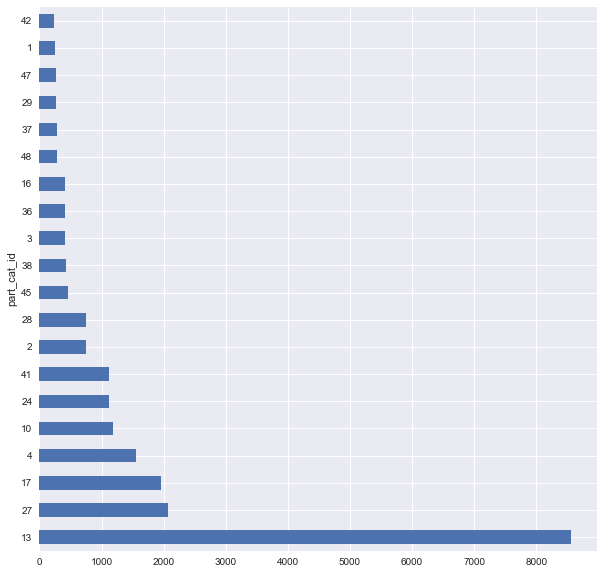

In [17]:
parts_df.groupby('part_cat_id').size().sort_values(ascending=False)[:20].plot(kind='barh',figsize=(10,10))
plt.show()

In [18]:
colors_df = colors_df.rename(str,columns={'id':'color_id','name':'color_name'})
inventory_part_df = inventory_part_df.rename(str,columns={'quantity':'Q_inv_parts'})
dfff = colors_df.merge(inventory_part_df,on='color_id').merge(dff,on='inventory_id')
dfff.groupby('color_name').size()

color_name
Black                44
Blue                 24
Dark Bluish Gray      2
Flat Dark Gold        6
Green                 5
Light Bluish Gray     3
Light Gray            9
Medium Blue          24
Metallic Gold         1
Pearl Gold            3
Red                   2
Royal Blue           49
Trans-Green           3
Trans-Red             3
Trans-Yellow          3
Unknown              34
White                19
Yellow               24
[No Color]           81
dtype: int64

In [19]:
# Filtering out rows with unknown color or no color
dfff = dfff[~ dfff['color_name'].isin(['Unknown','[No Color]'])]
dfff.groupby('color_name').size()

color_name
Black                44
Blue                 24
Dark Bluish Gray      2
Flat Dark Gold        6
Green                 5
Light Bluish Gray     3
Light Gray            9
Medium Blue          24
Metallic Gold         1
Pearl Gold            3
Red                   2
Royal Blue           49
Trans-Green           3
Trans-Red             3
Trans-Yellow          3
White                19
Yellow               24
dtype: int64

In [20]:
dfff.groupby('set_id').size()

set_id
10173-1     3
1064-1     16
1417-2      2
2995-1      1
2996-1      1
322-1       1
3404-1      1
344-1       1
346-2       1
3804-1      1
4548-1      3
5576-1      1
5994-1      1
5999-1      1
6837-1      1
6900-1      1
6905-1      1
7507-1      1
7508-1      1
7509-1      1
7514-1      1
7907-10     4
7907-11     4
7907-12     4
7907-13     4
7907-14     4
7907-15     4
7907-16     4
7907-17     4
7907-18     4
           ..
7958-7      1
7958-8      1
7958-9      1
8581-1      1
8582-1      1
8583-1      1
8584-1      1
8585-1      1
8586-1      1
8593-1      1
8596-1      1
8601-1      1
8607-1      1
8621-1      1
8622-1      1
8623-1      1
8782-1      1
8783-1      1
8784-1      1
8785-1      1
8786-1      2
8791-1      2
8795-1      2
8900-1      2
8902-1      2
8905-1      2
9738-1      1
9916-1      1
k1062b     16
pk1062     16
Length: 96, dtype: int64

In [21]:
dfff[dfff['set_id']=='7907-24']

,color_id,color_name,rgb,is_trans,inventory_id,part_id,Q_inv_parts,is_spare,set_id,quantity,name,year,theme_id,num_parts
53,0,Black,05131D,f,8348,41334,1.0,f,7907-24,1,Advent Calendar 2007 City (Day 23) Computer De...,2007,220,10
77,1,Blue,0055BF,f,8348,970c00,1.0,f,7907-24,1,Advent Calendar 2007 City (Day 23) Computer De...,2007,220,10
101,14,Yellow,F2CD37,f,8348,3626bpr0387,1.0,f,7907-24,1,Advent Calendar 2007 City (Day 23) Computer De...,2007,220,10
125,73,Medium Blue,5A93DB,f,8348,973pr1244c01,1.0,f,7907-24,1,Advent Calendar 2007 City (Day 23) Computer De...,2007,220,10


In [22]:
dfff = dfff.groupby(['set_id','color_name','rgb']).size().to_frame(name = 'num').reset_index()
dfff.head(10)

,set_id,color_name,rgb,num
0,10173-1,Black,05131D,2
1,10173-1,Dark Bluish Gray,6C6E68,1
2,1064-1,Black,05131D,2
3,1064-1,Green,237841,1
4,1064-1,Light Gray,9BA19D,3
5,1064-1,Royal Blue,4C61DB,1
6,1064-1,Trans-Green,84B68D,1
7,1064-1,Trans-Red,C91A09,1
8,1064-1,Trans-Yellow,F5CD2F,1
9,1064-1,White,FFFFFF,6


In [23]:
df_temp = dfff.sort_values('num').drop_duplicates(subset='set_id',keep='first')
df_temp

,set_id,color_name,rgb,num
97,7907-25,Medium Blue,5A93DB,1
115,7907-7,Black,05131D,1
119,7907-8,Black,05131D,1
114,7907-6,Yellow,F2CD37,1
123,7907-9,Black,05131D,1
127,7958-10,Royal Blue,4C61DB,1
128,7958-11,Royal Blue,4C61DB,1
129,7958-12,Royal Blue,4C61DB,1
130,7958-13,Royal Blue,4C61DB,1
131,7958-14,Royal Blue,4C61DB,1


In [24]:
df_tempp = df_temp.groupby(['color_name','rgb']).size().to_frame(name = 'num_sets').reset_index()
df_tempp

,color_name,rgb,num_sets
0,Black,05131D,28
1,Blue,0055BF,1
2,Dark Bluish Gray,6C6E68,2
3,Flat Dark Gold,B48455,6
4,Green,237841,3
5,Light Bluish Gray,A0A5A9,3
6,Medium Blue,5A93DB,3
7,Metallic Gold,DBAC34,1
8,Red,C91A09,2
9,Royal Blue,4C61DB,42


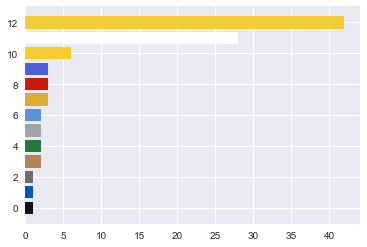

In [25]:
plt.barh(df_tempp.index,np.sort(list(df_tempp['num_sets'].values)),color='#'+df_tempp.rgb)
plt.show()

In [26]:
def get_luminance(hex_val):
    R = int(hex_val[1:3],16)
    G = int(hex_val[3:5],16)
    B = int(hex_val[5:7],16)
    luminance = np.sqrt(0.299*R**2 + 0.587*G**2 + 0.114*B**2)
    return luminance

In [27]:
df_luminance = pd.merge(df_temp,sets_df,on='set_id')
df_luminance.head()

,set_id,color_name,rgb,num,name,year,theme_id,num_parts
0,7907-25,Medium Blue,5A93DB,1,Advent Calendar 2007 City (Day 24) Christmas Tree,2007,220,27
1,7907-7,Black,05131D,1,Advent Calendar 2007 City (Day 6) Directional...,2007,220,22
2,7907-8,Black,05131D,1,Advent Calendar 2007 City (Day 7) Airline Wor...,2007,220,5
3,7907-6,Yellow,F2CD37,1,Advent Calendar 2007 City (Day 5) Barricade,2007,220,12
4,7907-9,Black,05131D,1,Advent Calendar 2007 City (Day 8) Luggage Cart,2007,220,9


In [28]:
df_luminance['luminance'] = df_luminance['rgb'].apply(get_luminance)

In [29]:
df_luminance.head()

,set_id,color_name,rgb,num,name,year,theme_id,num_parts,luminance
0,7907-25,Medium Blue,5A93DB,1,Advent Calendar 2007 City (Day 24) Christmas Tree,2007,220,27,103.623163
1,7907-7,Black,05131D,1,Advent Calendar 2007 City (Day 6) Directional...,2007,220,22,58.227073
2,7907-8,Black,05131D,1,Advent Calendar 2007 City (Day 7) Airline Wor...,2007,220,5,58.227073
3,7907-6,Yellow,F2CD37,1,Advent Calendar 2007 City (Day 5) Barricade,2007,220,12,163.457264
4,7907-9,Black,05131D,1,Advent Calendar 2007 City (Day 8) Luggage Cart,2007,220,9,58.227073


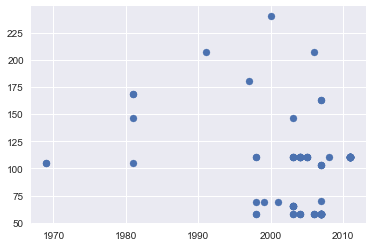

In [30]:
plt.scatter(df_luminance.year,df_luminance.luminance)
plt.show()

In [31]:
any(df_luminance.year==1980)

False

As you can see, there is no datapoint that dated to 1980. This may be due to the consecutive merging process of dataframes where there might be a discrepancy between the different ids.

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
%matplotlib inline

In [33]:
# file path 
path = './data/bikes/metro-bike-share-trip-data.json'
# read 
data_bikes = pd.read_json(path, orient='columns')
data_bikes.head(100)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.23649,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.23703,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.23309,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.25905,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.25384,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.25244,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.23894,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944063,One Way


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [34]:
#Description of the type and the value range of each attribute
for x in data_bikes.columns:
    print('field name : {}, type : {}, range {} - {} '.format(x,data_bikes[x].dtype,data_bikes[x].min(),data_bikes[x].max()))

field name : Bike ID, type : float64, range 1349.0 - 6728.0 
field name : Duration, type : int64, range 60 - 86400 
field name : End Time, type : object, range 2016-07-07T04:20:00 - 2017-04-02T10:32:00 
field name : Ending Station ID, type : float64, range 3000.0 - 4108.0 
field name : Ending Station Latitude, type : float64, range 0.0 - 34.0642815 
field name : Ending Station Longitude, type : float64, range -118.472832 - 0.0 
field name : Passholder Type, type : object, range Flex Pass - Walk-up 
field name : Plan Duration, type : float64, range 0.0 - 365.0 
field name : Start Time, type : object, range 2016-07-07T04:17:00 - 2017-03-31T23:45:00 
field name : Starting Station ID, type : float64, range 3000.0 - 4108.0 
field name : Starting Station Latitude, type : float64, range 0.0 - 34.0642815 
field name : Starting Station Longitude, type : float64, range -118.472832 - 0.0 
field name : Trip ID, type : int64, range 1912818 - 23794218 
field name : Trip Route Category, type : object

In [35]:
# Notice the NaNs 
(data_bikes[data_bikes['Passholder Type']=='Staff Annual'])

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
55790,5718.0,360,2016-10-01T16:44:00,3080.0,34.034210,-118.254593,Staff Annual,NaN,2016-10-01T16:38:00,3010.0,34.037048,-118.254868,8443856,One Way
55883,6579.0,840,2016-10-01T18:38:00,3038.0,34.046822,-118.248352,Staff Annual,NaN,2016-10-01T18:24:00,3019.0,34.038609,-118.260857,8453843,One Way
56613,5908.0,2820,2016-10-03T09:22:00,NaN,NaN,NaN,Staff Annual,NaN,2016-10-03T08:35:00,3062.0,34.047749,-118.243172,8640407,One Way
56854,6664.0,420,2016-10-03T16:12:00,3035.0,34.048401,-118.260948,Staff Annual,NaN,2016-10-03T16:05:00,3040.0,34.053570,-118.266357,8674462,One Way
57202,5776.0,60,2016-10-04T07:31:00,3069.0,34.050880,-118.248253,Staff Annual,NaN,2016-10-04T07:30:00,3069.0,34.050880,-118.248253,8747945,Round Trip
57226,6574.0,60,2016-10-04T08:00:00,3028.0,34.058319,-118.246094,Staff Annual,NaN,2016-10-04T07:59:00,3028.0,34.058319,-118.246094,8747928,Round Trip
57240,6006.0,600,2016-10-04T08:31:00,3063.0,34.049198,-118.252831,Staff Annual,NaN,2016-10-04T08:21:00,3042.0,34.049301,-118.238808,8752638,One Way
57256,6566.0,12540,2016-10-04T12:06:00,NaN,NaN,NaN,Staff Annual,NaN,2016-10-04T08:37:00,3062.0,34.047749,-118.243172,8772191,One Way
57883,6216.0,600,2016-10-05T08:46:00,3063.0,34.049198,-118.252831,Staff Annual,NaN,2016-10-05T08:36:00,3042.0,34.049301,-118.238808,8872739,One Way
57885,6273.0,3180,2016-10-05T09:31:00,NaN,NaN,NaN,Staff Annual,NaN,2016-10-05T08:38:00,3062.0,34.047749,-118.243172,8877694,One Way


In the dataset we have two main categorical variables: "Passholder Type" and "Trip Route Category". Moreover "End Time" and "Start Time" represent specific time and dates, so we will convert them in a *datatime* type such that the analysis can be easier afterwards.

In [36]:
#We convert each categorical value into a number
data_bikes["Passholder Type"] = data_bikes["Passholder Type"].astype('category')
data_bikes["Passholder Type"] = data_bikes["Passholder Type"].cat.codes

data_bikes["Trip Route Category"] = data_bikes["Trip Route Category"].astype('category')
data_bikes["Trip Route Category"] = data_bikes["Trip Route Category"].cat.codes

In [37]:
#We convert the obj data representing dates into datetime type
data_bikes['End Time']=pd.to_datetime(data_bikes['End Time'], format='%Y-%m-%dT%H:%M:%S')
data_bikes['Start Time']=pd.to_datetime(data_bikes['Start Time'], format='%Y-%m-%dT%H:%M:%S')

In [38]:
data_bikes.head(10)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07 04:20:00,3014.0,34.056610,-118.23721,1,30.0,2016-07-07 04:17:00,3014.0,34.056610,-118.23721,1912818,1
1,6281.0,1980,2016-07-07 06:33:00,3014.0,34.056610,-118.23721,1,30.0,2016-07-07 06:00:00,3014.0,34.056610,-118.23721,1919661,1
2,5861.0,300,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,0,365.0,2016-07-07 10:32:00,3016.0,34.052898,-118.24156,1933383,1
3,5861.0,10860,2016-07-07 13:38:00,3016.0,34.052898,-118.24156,0,365.0,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,1944197,1
4,6674.0,420,2016-07-07 12:58:00,3032.0,34.049889,-118.25588,3,0.0,2016-07-07 12:51:00,3032.0,34.049889,-118.25588,1940317,1
5,6717.0,780,2016-07-07 13:04:00,3054.0,34.039219,-118.23649,1,30.0,2016-07-07 12:51:00,3021.0,34.045609,-118.23703,1944075,0
6,5721.0,600,2016-07-07 13:04:00,3014.0,34.056610,-118.23721,1,30.0,2016-07-07 12:54:00,3022.0,34.046070,-118.23309,1944073,0
7,5957.0,600,2016-07-07 13:09:00,3005.0,34.048550,-118.25905,0,365.0,2016-07-07 12:59:00,3076.0,34.040600,-118.25384,1944067,0
8,6137.0,2880,2016-07-07 13:49:00,3031.0,34.044701,-118.25244,0,365.0,2016-07-07 13:01:00,3031.0,34.044701,-118.25244,1944062,1
9,6351.0,960,2016-07-07 13:17:00,3078.0,34.064281,-118.23894,1,30.0,2016-07-07 13:01:00,3031.0,34.044701,-118.25244,1944063,0


In [39]:
print('The initial size of the dataset is: '+str(len(data_bikes)))
# Round Trip -> 1
# One Way    -> 0

#Flex         -> 0
#Monthly      -> 1
#Staff Annual -> 2
#Walk Up      -> 3


The initial size of the dataset is: 132427


We have also found out that "Ending Station Latitude" and "Starting Station Latitude" have some outliers that could affect our evaluations. These outliers consists near 0 values and nans. So we will first remove them. 
Also, for Staff Annual pass holder type, all pass duration is NaN and therefore we filtered them out.

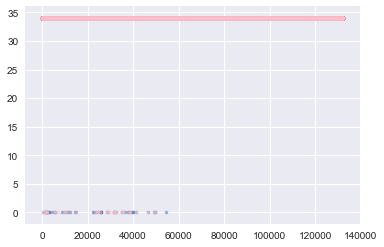

In [40]:
#Checking for outlier in "Ending Station Latitude" and "Starting Station Latitude" attribites 
plt.scatter(data_bikes.index, data_bikes["Ending Station Latitude"], s=10, alpha=0.5)
plt.scatter(data_bikes.index, data_bikes["Starting Station Latitude"],color = 'pink', s=10, alpha=0.5)
plt.show()

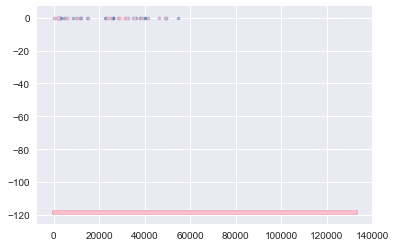

In [41]:
plt.scatter(data_bikes.index, data_bikes["Ending Station Longitude"], s=10, alpha=0.5)
plt.scatter(data_bikes.index, data_bikes["Starting Station Longitude"],color = 'pink', s=10, alpha=0.5)
plt.show()

In [42]:
np.unique(data_bikes["Starting Station Latitude"])

array([ 0.       , 33.987381 , 34.024479 , 34.02589  , 34.028511 ,
       34.0310516, 34.031052 , 34.0318909, 34.031891 , 34.0328598,
       34.03286  , 34.03421  , 34.0342102, 34.034801 , 34.0348015,
       34.0348816, 34.034882 , 34.0356789, 34.035679 , 34.0358009,
       34.035801 , 34.037048 , 34.0370483, 34.03746  , 34.0374603,
       34.0379486, 34.037949 , 34.0386086, 34.038609 , 34.039188 ,
       34.0391884, 34.0392189, 34.039219 , 34.039871 , 34.0398712,
       34.0399818, 34.039982 , 34.0400391, 34.0405998, 34.0406   ,
       34.0409889, 34.040989 , 34.04113  , 34.0411301, 34.0416908,
       34.041691 , 34.0420609, 34.042061 , 34.04211  , 34.0421104,
       34.0437317, 34.043732 , 34.0441589, 34.044159 , 34.04417  ,
       34.0441704, 34.0447006, 34.044701 , 34.045181 , 34.0451813,
       34.0454216, 34.045422 , 34.0455399, 34.04554  , 34.0456085,
       34.04607  , 34.0460701, 34.04652  , 34.0465202, 34.0466118,
       34.046612 , 34.04681  , 34.0468102, 34.0468216, 34.0468

In [43]:
#Remove outliers
data_bikes = data_bikes.dropna()
data_bikes=data_bikes[data_bikes["Ending Station Longitude"] <-100]
data_bikes=data_bikes[data_bikes["Starting Station Longitude"] <-100]
data_bikes=data_bikes[data_bikes["Ending Station Latitude"] >1]
data_bikes=data_bikes[data_bikes["Starting Station Latitude"] >1]
print("The size of the data after filtering is "+str(len(data_bikes)))

The size of the data after filtering is 130655


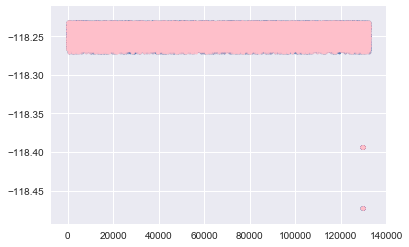

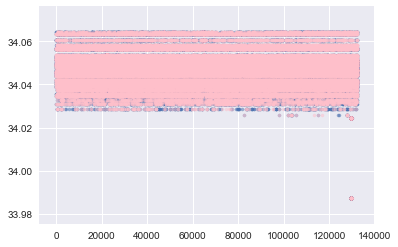

In [44]:
# Checking filtering results
plt.scatter(data_bikes.index, data_bikes["Ending Station Longitude"], s=10, alpha=0.5)
plt.scatter(data_bikes.index, data_bikes["Starting Station Longitude"],color = 'pink', s=10, alpha=0.5)
plt.show()
#Checking for outlier in "Ending Station Latitude" and "Starting Station Latitude" attribites 
plt.scatter(data_bikes.index, data_bikes["Ending Station Latitude"], s=10, alpha=0.5)
plt.scatter(data_bikes.index, data_bikes["Starting Station Latitude"],color = 'pink', s=10, alpha=0.5)
plt.show()

 By looking at the attributes of our dataset one can notice that there are several variables whose values can be deduced from others. For example if one knows the "Starting Station ID"and the "Ending Station ID" it is not neccessary to indicate the "Ending Station Latitude/Longitude" and the "Ending Station Latitude/Longitude" since those can be extracted from the prior knowledge of the location of each station based on its ID. Moreover we do not need "End Time" if we know "Start Time" and "Duration".  
The previous relationships between variables were based mainly on intuition, but one can apply also specific techniques, e.g. correlation analysis, to check whether there are other relationships. For this reason we decided also to analyze the correlation matrix. 
 Having redundancy variables can bring several problem: e.g. some independent variables may be found not to be significantly different from 0. In other words we could find out that some variables are statistically insignificant when they should be significant. More so the new dataset obtained by removing the redundant column would be less susceptible to inconsistencies. 

In [45]:
#Remove variable that depends on other variables values
data_bikes = data_bikes.drop("Ending Station Longitude", axis=1)
data_bikes = data_bikes.drop("Starting Station Longitude", axis=1)
data_bikes = data_bikes.drop("Ending Station Latitude", axis=1)
data_bikes = data_bikes.drop("Starting Station Latitude", axis=1)
data_bikes = data_bikes.drop("End Time", axis=1)
data_bikes = data_bikes.reset_index()

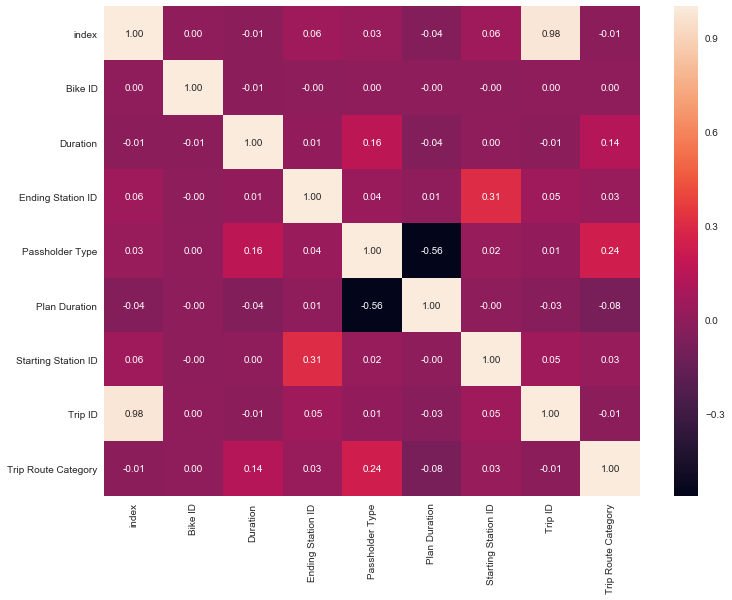

In [46]:
#Correlation matrix analysis
plt.figure(figsize=(12, 9)) 
sns.heatmap(data_bikes.corr(), annot=True, fmt=".2f")
plt.show()

From the analysis of the correlation matrix it is possible to notice that there are not high correlations among variables. 

In [47]:
#Print the data column type and shape
data_bikes.dtypes

index                           int64
Bike ID                       float64
Duration                        int64
Ending Station ID             float64
Passholder Type                  int8
Plan Duration                 float64
Start Time             datetime64[ns]
Starting Station ID           float64
Trip ID                         int64
Trip Route Category              int8
dtype: object

In [48]:
#The shape of each column is [1 x len(data_bikes)]
len(data_bikes)


130655

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

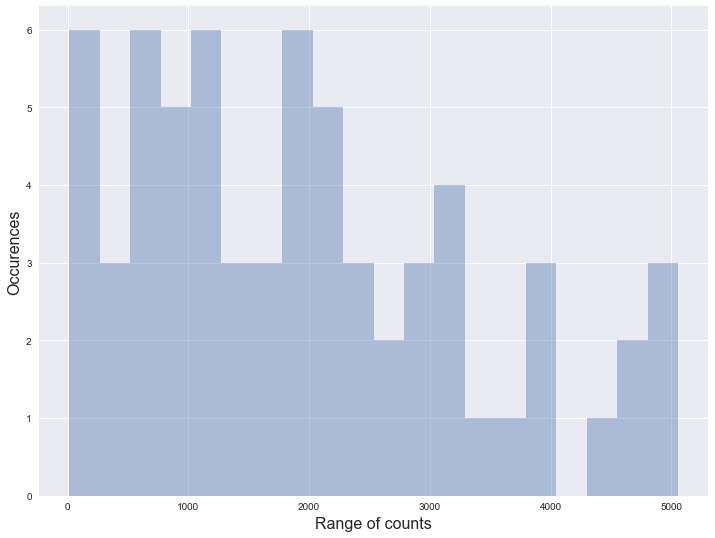

In [49]:
#1
#Distribution of the number of outgoing trips from each station
plt.figure(figsize=(12, 9))  
sns.set()
sns.distplot(data_bikes.groupby("Starting Station ID").size(),bins=20,kde=False)
plt.xlabel("Range of counts", fontsize=16)  
plt.ylabel("Occurences", fontsize=16)  

plt.show()

We will now look into the trip duration and the starting time to have an overall idea of the human behaviour regarding the favourite hour for starting the trip and the most common durations. 
In order to do that we will perform the following points:
1- We will first extract the trip starting hour from our dataset, in particular from the starting date information, which is a datetime attribute storing information about the day, month, year, hour, minutes and seconds when the trip started.
2- We will then plot the histograms of the trip starting hour and the duration
3- We will discuss about the human behaviour.

In [50]:
#2
#We extract the hours from the Start Time attribute
def extract_hour(time):
    string = str(time)
    return datetime.strptime(string, '%Y-%m-%d %H:%M:%S').hour

StartHour_df = data_bikes["Start Time"].apply(extract_hour).copy()

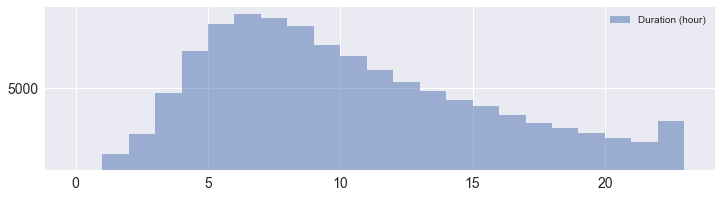

C:\Users\Ahmed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


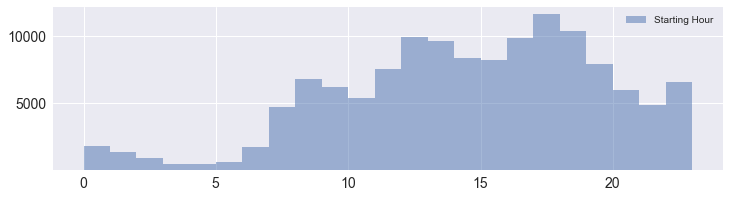

In [51]:
#Plot histogram
plt.figure(figsize=(12, 3)) 
ax = plt.subplot(111)  
plt.hist(data_bikes["Duration"]/60.0,bins=np.arange(24), alpha=0.5, label='Duration (hour)' )#.hist(bins=20) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

plt.xticks(fontsize=14) 
plt.yticks(range(5000, 10000, 5000), fontsize=14)   
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 3))
plt.xticks(fontsize=14)  
plt.yticks(range(5000, 30001, 5000), fontsize=14)   
plt.legend(loc='upper right')
plt.hist(StartHour_df,bins=np.arange(24), alpha=0.5, label='Starting Hour' )
plt.legend(loc='upper right')
plt.show()

From the previous plots it is possible to see that the most popular starting hours are (approximately) 8:00, 12:00 and 17:00. This could be related to the time when people move from home to work and viceversa or when they have to go to lunch.
In the early morning the number of trips tends to decrease.
The favourite trip duration is around 8 hours.

__3-__ For each trip route category, calculate the proportion of trips by passholder type and present your results in a stacked bar chart with normalized height.

In [52]:
data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index()

,Passholder Type,Trip Route Category,num
0,0,0,8973
1,0,1,483
2,1,0,76777
3,1,1,3690
4,3,0,32293
5,3,1,8439


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

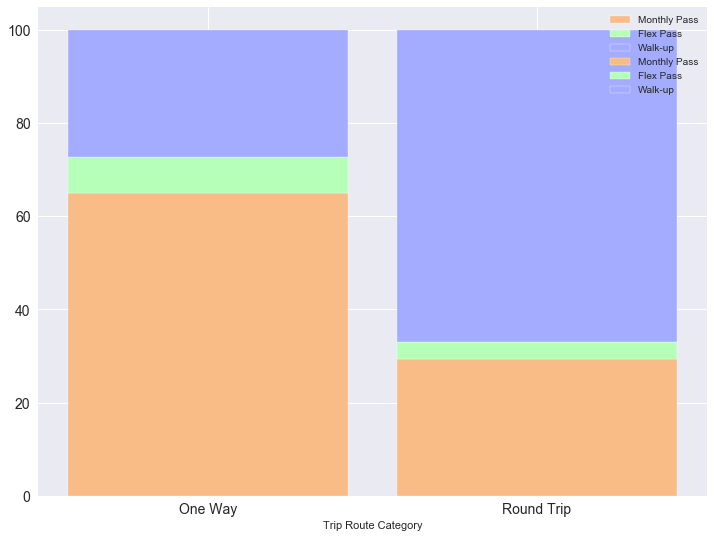

In [53]:
a= data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index().iloc[0].num
b= data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index().iloc[2].num
c= data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index().iloc[4].num
total_one_way_trips = a+b+c

plt.figure(figsize=(12, 9))
plt.bar(0, b*100/total_one_way_trips,  color='#f9bc86', edgecolor='white', width=0.85, label='Monthly Pass')
plt.bar(0, a*100/total_one_way_trips,bottom=b*100/total_one_way_trips, edgecolor='white', width=0.85,color='#b5ffb9', label='Flex Pass')
plt.bar(0, c*100/total_one_way_trips, bottom=(a+b)*100/total_one_way_trips,  color='#a3acff', edgecolor='white', width=0.85, label='Walk-up')

a= data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index().iloc[1].num
b= data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index().iloc[3].num
c= data_bikes.groupby(['Passholder Type','Trip Route Category']).size().to_frame(name = 'num').reset_index().iloc[5].num
total_one_way_trips = a+b+c
plt.bar(1, b*100/total_one_way_trips,  color='#f9bc86', edgecolor='white', width=0.85, label='Monthly Pass')
plt.bar(1, a*100/total_one_way_trips,bottom=b*100/total_one_way_trips, edgecolor='white', width=0.85,color='#b5ffb9', label='Flex Pass')
plt.bar(1, c*100/total_one_way_trips, bottom=(a+b)*100/total_one_way_trips,  color='#a3acff', edgecolor='white', width=0.85, label='Walk-up')
# Custom x axis
names = ('One Way','Round Trip')
plt.xticks(np.unique(data_bikes['Trip Route Category']), names)
plt.xlabel("Trip Route Category")
plt.legend(loc='upper right')
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

__4-__Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.

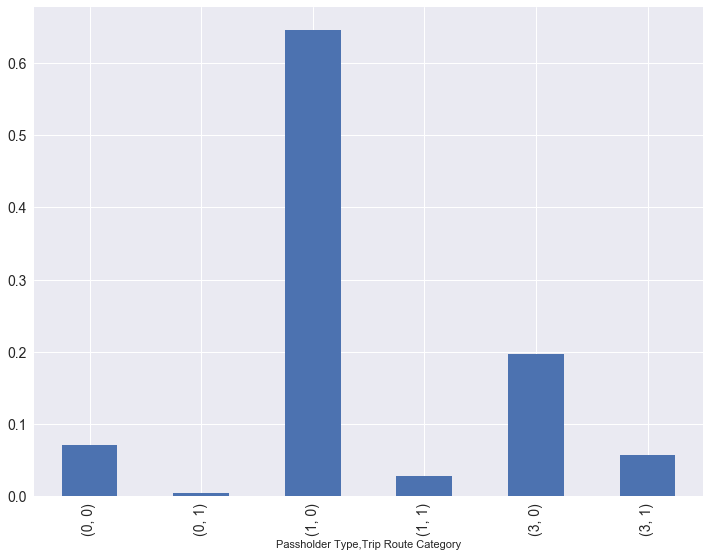

In [54]:
passholdertype_morning = data_bikes[StartHour_df.values<12]
passholdertype_morning.head()
plt.figure(figsize=(12, 9))
((passholdertype_morning.groupby(["Passholder Type", "Trip Route Category"]).size())/passholdertype_morning.shape[0]).plot(kind = 'bar')
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 
plt.show()

In [55]:
passholdertype_morning.groupby(["Passholder Type", "Trip Route Category"]).size()

Passholder Type  Trip Route Category
0                0                       2634
                 1                        126
1                0                      24316
                 1                       1025
3                0                       7405
                 1                       2127
dtype: int64

From the previous plot one can see a pick related to *Passholder Type* equal to *Monthly Pass* and *Trip Rout Category* equal to *One Way*. This could be due to the fact that people prefer to use the bike for going to a specific place without the obligation to turn it back to the same place where they start the trip, or maybe they just prefer to take another means of transport to go back because they probably know that they will be tired afterwards.

B3.5 Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [56]:
data_bikes["Hours"] = StartHour_df

In [57]:
cumsumHour=np.cumsum(data_bikes.groupby(["Hours"]).size().tolist())

In [58]:
time = np.argmin(np.abs((data_bikes.shape[0]/2)-cumsumHour))+1

In [59]:
dfBefore = pd.DataFrame({'countBefore': data_bikes[data_bikes["Hours"]<time].groupby(["Passholder Type", "Trip Route Category"]).size()}).reset_index()

In [60]:
dfAfter = pd.DataFrame({'countAfter': data_bikes[data_bikes["Hours"]>=time].groupby(["Passholder Type", "Trip Route Category"]).size()}).reset_index()

In [61]:
agg_df= pd.concat([dfBefore,dfAfter]).reset_index(drop='True').fillna(0)
agg_df

,Passholder Type,Trip Route Category,countAfter,countBefore
0,0,0,0.0,4584.0
1,0,1,0.0,268.0
2,1,0,0.0,38948.0
3,1,1,0.0,2011.0
4,3,0,0.0,15487.0
5,3,1,0.0,4180.0
6,0,0,4389.0,0.0
7,0,1,215.0,0.0
8,1,0,37829.0,0.0
9,1,1,1679.0,0.0


In [62]:
print('The number of trips in the first time interval is '+str(np.sum(agg_df['countBefore'])))
print('The number of trips in the second time interval is '+str(np.sum(agg_df['countAfter'])))

The number of trips in the first time interval is 65478.0
The number of trips in the second time interval is 65177.0


In [63]:
import seaborn as sns

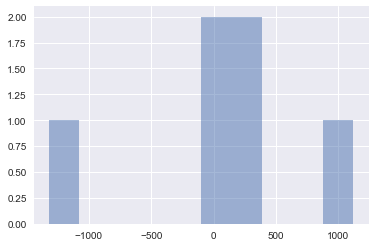

In [64]:
plt.hist(dfBefore["countBefore"]-dfAfter["countAfter"], alpha=0.5, label='Duration (hour)' )#.hist(bins=20) 
plt.show()

As you can see in the plot above, the difference of the distribution of number of trips between the first and second time intervals is pretty symmetric. The proportion of trips doesn't depend on the time interval. We can deep that the comparison is fair in the sense that we've taken roughly the same number of total trips between the two time slots.

To answer the question about adding a more comples paying scheme, we have to check the monthly pass total number of trips during the first and second interval and compare.

In [65]:
data_bikes.groupby(['Passholder Type']).size().to_frame(name = 'num').reset_index()

,Passholder Type,num
0,0,9456
1,1,80467
2,3,40732


In [66]:
before = data_bikes[data_bikes["Hours"]<time]
after = data_bikes[data_bikes["Hours"]>time]
before.groupby(['Passholder Type']).size().to_frame(name = 'num').reset_index()

,Passholder Type,num
0,0,4852
1,1,40959
2,3,19667


In [67]:
after.groupby(['Passholder Type']).size().to_frame(name = 'num').reset_index()

,Passholder Type,num
0,0,4024
1,1,35037
2,3,17906


A Monthly pass corresponds to Passholder Type 1 which means in the morning interval almost 5000  more people are using monthly passes compared to the evening. It's hard to predict the sales of passes because any changes would alter the statistics that we have currently ie the more people buy the monthly pass, that doesn't necessarily mean more people are buying passes and using the bikes. Some other people who were using different passes could change their mind if the pricing changes. Intuitively, since the monthly pass is already more popular during the morning, it would make more sense to reduce its price for the evening time interval to attract more people.